In [4]:
import pandas as pd
from pyomo.environ import *
from itertools import combinations

from c_plot import *
from clean_data_cor import *

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Instancias

In [ ]:
# INSTANCIAS
# {start} chamar dados
demanda = pd.read_csv('/home/wilmer/Documentos/Codes/tesis/instancias/instancia1/demanda.csv')
preco_ = pd.read_csv('/home/wilmer/Documentos/Codes/tesis/instancias/instancia1/preco.csv')
rota0 = pd.read_csv('/home/wilmer/Documentos/Codes/tesis/instancias/instancia1/rota.csv')
# {end} chamar dados

rota1 = eval(rota0['Route'][0])

rota = [0] + rota1
# periodo_lim = demanda['DBD'].tolist()[-4:]
# demanda_lim = demanda[demanda['DBD'].isin(periodo_lim)]
origin1, destin, oridest, vagones,  periodos, stations, clases, preco, dem = clean_data(demanda, preco_)

adjacen = [(i,j) for i,j in oridest if rota1.index(j) == rota1.index(i)+1]
noAdjacen = [(i,j) for i,j in oridest if rota1.index(j) != rota1.index(i)+1]

origin1 = [i for i in rota if i in origin1]
origin2 = [0] + origin1

destin = [i for i in rota if i in destin]
n = len(rota)-1
cap = 565 #561 #76

# Instancias de Prueba

In [ ]:
# demanda = pd.read_csv('/home/wilmer/Documentos/Codes/tesis/instancias/demanda.csv')
# preco_ = pd.read_csv('/home/wilmer/Documentos/Codes/tesis/instancias/preco.csv')

# rota11 = ['NYP' ,'NWK' ,'EWR' ,'MET' ,'TRE' ,'PHL' ,'WIL' ,'BAL' ,'BWI' ,'NCR' ,'WAS']
# rota1 = [i+1 for i in range(len(rota11))]
# repla_route = {j:i+1 for i,j in enumerate(rota11)}

# demanda['Origin'] = demanda['Origin'].replace(repla_route)
# demanda['Destination'] = demanda['Destination'].replace(repla_route)

# preco_['Origin'] = preco_['Origin'].replace(repla_route)
# preco_['Destination'] = preco_['Destination'].replace(repla_route)

In [5]:
import random 
rota1 = ['uno','dos','tres', 'cuatro', 'cinco']
rota = [0] + rota1

oridest = [('uno','dos'),
           ('uno','tres'),
           ('uno','cuatro'),
           ('uno','cinco'),
           ('dos','tres'),
           ('dos','cuatro'),
           ('dos','cinco'),
           ('tres','cuatro'),
           ('tres','cinco'),
           ('cuatro','cinco'),]

adjacen = [(i,j) for i,j in oridest if rota1.index(j) == rota1.index(i)+1]
noAdjacen = [(i,j) for i,j in oridest if rota1.index(j) != rota1.index(i)+1]

origin1 = ['uno','dos','tres', 'cuatro']
origin2 = [0] + origin1

destin = ['dos','tres','cuatro', 'cinco']
vagones = ['p','z']
periodos = [0,1]
cap = 700 
n = len(rota) - 1 
clases = {'p':[1,5,7],'z':[1,3,7]}

# dem = {(i,j,v,k,t): np.random.randint(1,100) for i,j in oridest for v in vagones for k in clases[v] for t in periodos }

# preco = {}
# for i,j in oridest:
#     for v in vagones:
#         aleat = sorted(random.sample(range(50, 2000 + 1), len(clases[v])), reverse=True)
#         for k,valor in enumerate(aleat):
#             preco[(i,j,v,clases[v][k])] = valor



# # corrigir instancias
# dem = {(i,j,v,k,t): dem[(i,j,v,k,t)] if (i,j,v,k,t) in dem else 0  for i,j in oridest for v in vagones for k in clases[v] for t in periodos}
# preco = {(i,j,v,k): preco[(i,j,v,k)] if (i,j,v,k) in preco else 0  for i,j in oridest for v in vagones for k in clases[v] }

In [6]:
dem = {('uno', 'dos', 'p', 1, 0): 99,
 ('uno', 'dos', 'p', 1, 1): 72,
 ('uno', 'dos', 'p', 5, 0): 81,
 ('uno', 'dos', 'p', 5, 1): 77,
 ('uno', 'dos', 'p', 7, 0): 64,
 ('uno', 'dos', 'p', 7, 1): 67,
 ('uno', 'dos', 'z', 1, 0): 3,
 ('uno', 'dos', 'z', 1, 1): 7,
 ('uno', 'dos', 'z', 3, 0): 44,
 ('uno', 'dos', 'z', 3, 1): 3,
 ('uno', 'dos', 'z', 7, 0): 34,
 ('uno', 'dos', 'z', 7, 1): 64,
 ('uno', 'tres', 'p', 1, 0): 90,
 ('uno', 'tres', 'p', 1, 1): 20,
 ('uno', 'tres', 'p', 5, 0): 11,
 ('uno', 'tres', 'p', 5, 1): 51,
 ('uno', 'tres', 'p', 7, 0): 11,
 ('uno', 'tres', 'p', 7, 1): 77,
 ('uno', 'tres', 'z', 1, 0): 31,
 ('uno', 'tres', 'z', 1, 1): 98,
 ('uno', 'tres', 'z', 3, 0): 81,
 ('uno', 'tres', 'z', 3, 1): 21,
 ('uno', 'tres', 'z', 7, 0): 56,
 ('uno', 'tres', 'z', 7, 1): 39,
 ('uno', 'cuatro', 'p', 1, 0): 88,
 ('uno', 'cuatro', 'p', 1, 1): 76,
 ('uno', 'cuatro', 'p', 5, 0): 82,
 ('uno', 'cuatro', 'p', 5, 1): 34,
 ('uno', 'cuatro', 'p', 7, 0): 67,
 ('uno', 'cuatro', 'p', 7, 1): 41,
 ('uno', 'cuatro', 'z', 1, 0): 1,
 ('uno', 'cuatro', 'z', 1, 1): 66,
 ('uno', 'cuatro', 'z', 3, 0): 62,
 ('uno', 'cuatro', 'z', 3, 1): 24,
 ('uno', 'cuatro', 'z', 7, 0): 19,
 ('uno', 'cuatro', 'z', 7, 1): 35,
 ('uno', 'cinco', 'p', 1, 0): 71,
 ('uno', 'cinco', 'p', 1, 1): 86,
 ('uno', 'cinco', 'p', 5, 0): 26,
 ('uno', 'cinco', 'p', 5, 1): 75,
 ('uno', 'cinco', 'p', 7, 0): 2,
 ('uno', 'cinco', 'p', 7, 1): 23,
 ('uno', 'cinco', 'z', 1, 0): 59,
 ('uno', 'cinco', 'z', 1, 1): 59,
 ('uno', 'cinco', 'z', 3, 0): 1,
 ('uno', 'cinco', 'z', 3, 1): 82,
 ('uno', 'cinco', 'z', 7, 0): 3,
 ('uno', 'cinco', 'z', 7, 1): 90,
 ('dos', 'tres', 'p', 1, 0): 10,
 ('dos', 'tres', 'p', 1, 1): 40,
 ('dos', 'tres', 'p', 5, 0): 65,
 ('dos', 'tres', 'p', 5, 1): 39,
 ('dos', 'tres', 'p', 7, 0): 59,
 ('dos', 'tres', 'p', 7, 1): 29,
 ('dos', 'tres', 'z', 1, 0): 32,
 ('dos', 'tres', 'z', 1, 1): 24,
 ('dos', 'tres', 'z', 3, 0): 59,
 ('dos', 'tres', 'z', 3, 1): 48,
 ('dos', 'tres', 'z', 7, 0): 28,
 ('dos', 'tres', 'z', 7, 1): 95,
 ('dos', 'cuatro', 'p', 1, 0): 8,
 ('dos', 'cuatro', 'p', 1, 1): 85,
 ('dos', 'cuatro', 'p', 5, 0): 55,
 ('dos', 'cuatro', 'p', 5, 1): 11,
 ('dos', 'cuatro', 'p', 7, 0): 33,
 ('dos', 'cuatro', 'p', 7, 1): 43,
 ('dos', 'cuatro', 'z', 1, 0): 83,
 ('dos', 'cuatro', 'z', 1, 1): 56,
 ('dos', 'cuatro', 'z', 3, 0): 21,
 ('dos', 'cuatro', 'z', 3, 1): 79,
 ('dos', 'cuatro', 'z', 7, 0): 13,
 ('dos', 'cuatro', 'z', 7, 1): 37,
 ('dos', 'cinco', 'p', 1, 0): 28,
 ('dos', 'cinco', 'p', 1, 1): 24,
 ('dos', 'cinco', 'p', 5, 0): 39,
 ('dos', 'cinco', 'p', 5, 1): 75,
 ('dos', 'cinco', 'p', 7, 0): 15,
 ('dos', 'cinco', 'p', 7, 1): 10,
 ('dos', 'cinco', 'z', 1, 0): 30,
 ('dos', 'cinco', 'z', 1, 1): 91,
 ('dos', 'cinco', 'z', 3, 0): 48,
 ('dos', 'cinco', 'z', 3, 1): 26,
 ('dos', 'cinco', 'z', 7, 0): 2,
 ('dos', 'cinco', 'z', 7, 1): 30,
 ('tres', 'cuatro', 'p', 1, 0): 87,
 ('tres', 'cuatro', 'p', 1, 1): 1,
 ('tres', 'cuatro', 'p', 5, 0): 29,
 ('tres', 'cuatro', 'p', 5, 1): 77,
 ('tres', 'cuatro', 'p', 7, 0): 17,
 ('tres', 'cuatro', 'p', 7, 1): 51,
 ('tres', 'cuatro', 'z', 1, 0): 28,
 ('tres', 'cuatro', 'z', 1, 1): 46,
 ('tres', 'cuatro', 'z', 3, 0): 94,
 ('tres', 'cuatro', 'z', 3, 1): 91,
 ('tres', 'cuatro', 'z', 7, 0): 93,
 ('tres', 'cuatro', 'z', 7, 1): 99,
 ('tres', 'cinco', 'p', 1, 0): 2,
 ('tres', 'cinco', 'p', 1, 1): 80,
 ('tres', 'cinco', 'p', 5, 0): 3,
 ('tres', 'cinco', 'p', 5, 1): 21,
 ('tres', 'cinco', 'p', 7, 0): 17,
 ('tres', 'cinco', 'p', 7, 1): 36,
 ('tres', 'cinco', 'z', 1, 0): 88,
 ('tres', 'cinco', 'z', 1, 1): 2,
 ('tres', 'cinco', 'z', 3, 0): 27,
 ('tres', 'cinco', 'z', 3, 1): 22,
 ('tres', 'cinco', 'z', 7, 0): 47,
 ('tres', 'cinco', 'z', 7, 1): 14,
 ('cuatro', 'cinco', 'p', 1, 0): 4,
 ('cuatro', 'cinco', 'p', 1, 1): 80,
 ('cuatro', 'cinco', 'p', 5, 0): 32,
 ('cuatro', 'cinco', 'p', 5, 1): 73,
 ('cuatro', 'cinco', 'p', 7, 0): 64,
 ('cuatro', 'cinco', 'p', 7, 1): 27,
 ('cuatro', 'cinco', 'z', 1, 0): 97,
 ('cuatro', 'cinco', 'z', 1, 1): 75,
 ('cuatro', 'cinco', 'z', 3, 0): 76,
 ('cuatro', 'cinco', 'z', 3, 1): 53,
 ('cuatro', 'cinco', 'z', 7, 0): 19,
 ('cuatro', 'cinco', 'z', 7, 1): 49}

preco = {('uno', 'dos', 'p', 1): 1558,
 ('uno', 'dos', 'p', 5): 406,
 ('uno', 'dos', 'p', 7): 82,
 ('uno', 'dos', 'z', 1): 1999,
 ('uno', 'dos', 'z', 3): 1092,
 ('uno', 'dos', 'z', 7): 481,
 ('uno', 'tres', 'p', 1): 1339,
 ('uno', 'tres', 'p', 5): 403,
 ('uno', 'tres', 'p', 7): 228,
 ('uno', 'tres', 'z', 1): 1749,
 ('uno', 'tres', 'z', 3): 976,
 ('uno', 'tres', 'z', 7): 56,
 ('uno', 'cuatro', 'p', 1): 1710,
 ('uno', 'cuatro', 'p', 5): 1436,
 ('uno', 'cuatro', 'p', 7): 905,
 ('uno', 'cuatro', 'z', 1): 1990,
 ('uno', 'cuatro', 'z', 3): 601,
 ('uno', 'cuatro', 'z', 7): 175,
 ('uno', 'cinco', 'p', 1): 1228,
 ('uno', 'cinco', 'p', 5): 785,
 ('uno', 'cinco', 'p', 7): 738,
 ('uno', 'cinco', 'z', 1): 1970,
 ('uno', 'cinco', 'z', 3): 242,
 ('uno', 'cinco', 'z', 7): 81,
 ('dos', 'tres', 'p', 1): 1721,
 ('dos', 'tres', 'p', 5): 119,
 ('dos', 'tres', 'p', 7): 88,
 ('dos', 'tres', 'z', 1): 1997,
 ('dos', 'tres', 'z', 3): 1923,
 ('dos', 'tres', 'z', 7): 1745,
 ('dos', 'cuatro', 'p', 1): 1103,
 ('dos', 'cuatro', 'p', 5): 926,
 ('dos', 'cuatro', 'p', 7): 262,
 ('dos', 'cuatro', 'z', 1): 1511,
 ('dos', 'cuatro', 'z', 3): 1212,
 ('dos', 'cuatro', 'z', 7): 1182,
 ('dos', 'cinco', 'p', 1): 903,
 ('dos', 'cinco', 'p', 5): 580,
 ('dos', 'cinco', 'p', 7): 372,
 ('dos', 'cinco', 'z', 1): 474,
 ('dos', 'cinco', 'z', 3): 309,
 ('dos', 'cinco', 'z', 7): 89,
 ('tres', 'cuatro', 'p', 1): 1879,
 ('tres', 'cuatro', 'p', 5): 1877,
 ('tres', 'cuatro', 'p', 7): 105,
 ('tres', 'cuatro', 'z', 1): 1424,
 ('tres', 'cuatro', 'z', 3): 1394,
 ('tres', 'cuatro', 'z', 7): 678,
 ('tres', 'cinco', 'p', 1): 1326,
 ('tres', 'cinco', 'p', 5): 691,
 ('tres', 'cinco', 'p', 7): 312,
 ('tres', 'cinco', 'z', 1): 967,
 ('tres', 'cinco', 'z', 3): 952,
 ('tres', 'cinco', 'z', 7): 851,
 ('cuatro', 'cinco', 'p', 1): 1394,
 ('cuatro', 'cinco', 'p', 5): 779,
 ('cuatro', 'cinco', 'p', 7): 603,
 ('cuatro', 'cinco', 'z', 1): 1133,
 ('cuatro', 'cinco', 'z', 3): 876,
 ('cuatro', 'cinco', 'z', 7): 504}




# Modelo Matematico

In [7]:
#MODELO MATEMATICO
# instanciar o modelo
model = AbstractModel()

# Escalares
model.n = Param(initialize = n)
model.Q = Param(initialize = cap)

# conjuntos
model.I = Set(initialize = origin1)
model.I2 = Set(initialize = origin2)
model.J = Set(initialize = destin)
model.OD = Set(dimen=2, initialize = oridest)
model.V = Set(initialize = vagones)
model.T = Set(initialize = periodos)
model.VK = Set(model.V, initialize=clases)
model.NAD = Set(initialize=noAdjacen)
model.AD = Set(initialize=adjacen)

def wagons_class(model):
    return ((v,k) for v in clases.keys() for k in clases[v])
model.VKI = Set(dimen=2,initialize=wagons_class)

def bigRotas(model, i, j):
    listTemp = list(combinations(rota1[rota1.index(i):rota1.index(j)+1], 2))
    listTemp =  ((ii,jj) for ii,jj in listTemp if (ii,jj) in model.OD and (ii, jj) != (i,j)) #rota1.index(jj) == rota1.index(ii)+1 and 
    for ori, des in listTemp:
        yield (ori, des)
model.BR = Set(model.NAD, initialize=bigRotas)
    
def bigRotas(model):
    return ((o,d,i,j) for o,d in model.NAD for i,j in model.BR[o,d])
model.BRI = Set(dimen=4, initialize=bigRotas)

# #parâmetros indexados
model.P = Param(model.OD, model.VKI, initialize = preco)
model.d = Param(model.OD, model.VKI, model.T, initialize = dem)

# variáveis de decisão
model.X = Var(model.I2, model.J, model.VKI, model.T, within = NonNegativeIntegers)
model.Y = Var(model.I2, model.J, model.VKI, model.T, within = NonNegativeIntegers)
model.A = Var(model.I2, within = NonNegativeIntegers)
model.BNA = Var(model.I, model.J, model.VKI, model.T, within = Binary) #esta es una variable binaria, se activa si la variable "Y" toma un valor distinto de cero, [para los trechos no adjacentes]
model.Z = Var(model.I, model.J, model.VKI, model.T, within = Reals)
# model.BAL = Var(model.I, model.J, model.V, model.T, within = Binary) #esta es una variable binaria, se activa si la variable "Y" toma un valor distinto de cero, [para todos los trechos]

# função objetivo
def fo1(model):
    return sum(model.P[i,j,v,k]*(model.X[i,j,v,k,t]) for i,j in model.OD for v,k in model.VKI for t in model.T)
model.OBJ1 = Objective(rule = fo1, sense = maximize)


# restrições
def cap1(model, i):
    return model.A[rota[rota.index(i)]] == model.A[rota[rota.index(i)-1]] - sum(model.X[rota[rota.index(i)-1],j,v,k,t] for j in model.J for v,k in model.VKI for t in model.T if rota.index(j) >= rota.index(i)) + sum(model.X[j,i,v,k,t] for j in model.I for v,k in model.VKI for t in model.T if rota.index(j) < rota.index(i) and (j,i) in oridest)
model.ConstrainCap1 = Constraint(model.I, rule = cap1)


def cap2(model, i):
    return sum((model.X[i,j,v,k,t]) for j in model.J for v,k in model.VKI for t in model.T if i != j and (i,j) in oridest) <= model.A[rota[rota.index(i)]]
model.ConstrainCap2 = Constraint(model.I, rule = cap2)


def classe(model, i, j, v, k, t):
    lista = list(model.VK[v])
    if k != lista[-1]:
        pos_k = lista.index(k)
        return model.Y[i,j,v,k,t] >= model.Y[i,j,v,lista[pos_k+1],t]
    else:
        return Constraint.Skip
model.ConstrainClasse = Constraint(model.OD, model.VKI, model.T, rule = classe)


def assignment(model, i, j, v, k, t):
    return model.X[i,j,v,k,t] <= model.d[i,j,v,k,t]
model.ConstrainAssignment = Constraint(model.OD, model.VKI, model.T,rule = assignment)


def authorizationCap(model, i):
    return  sum(model.Y[i,j,v,list(model.VK[v])[0],t] for j in model.J for v in model.V for t in model.T if i != j and (i,j) in oridest) <= model.Q
model.ConstrainAuthorizationCap = Constraint(model.I, rule = authorizationCap)


def authorization(model, i, j, v, k, t):
    lista = list(model.VK[v])
    pos_k = lista.index(k)
    lista_sort = sorted(lista, reverse=True)
    if pos_k == 0:
        return  model.Y[i,j,v,lista_sort[pos_k],t] >=  model.X[i,j,v,lista_sort[pos_k],t]
    elif pos_k <= len(lista)-1 :
        return  model.Y[i,j,v,lista_sort[pos_k],t] >=  model.X[i,j,v,lista_sort[pos_k],t] + model.Y[i,j,v,lista_sort[pos_k-1],t]
    else:
        return Constraint.Skip
model.ConstrainAuthorization = Constraint(model.OD, model.VKI, model.T, rule = authorization)


# [start] --- Restricciones de Capitalismo
def activ_bin_autho_low(model, o, d, v, k, t):
    return model.BNA[o,d,v,k,t] <= model.Y[o,d,v,k,t]
model.ConstrainActiv_bin_autho_low = Constraint(model.NAD, model.VKI, model.T, rule = activ_bin_autho_low)

def activ_bin_autho_top(model, o, d, v, k, t):
    return model.Y[o,d,v,k,t] <= model.Q*model.BNA[o,d,v,k,t]
model.ConstrainActiv_bin_autho_top = Constraint(model.NAD, model.VKI, model.T, rule = activ_bin_autho_top)

def cal_betwen_autho_val(model,o,d,i,j,v,k,t):
    lista = list(model.VK[v])
    pos_k = lista.index(k)
    if pos_k == 0:
        return model.BNA[o,d,v,k,t] - model.BNA[o,d,v,lista[pos_k+1],t] -1 <= sum(model.Y[i,j,v,kk,t] for kk in model.VK[v] if lista.index(kk) > lista.index(k))
    elif pos_k == len(lista)-1: 
        return model.BNA[o,d,v,k,t] <= model.Y[i,j,v,k,t]
    elif len(lista) >= 3:
        return model.BNA[o,d,v,k,t] + model.BNA[o,d,v,lista[pos_k-1],t] - model.BNA[o,d,v,lista[pos_k+1],t] - 2 <= sum(model.Y[i,j,v,kk,t] for kk in model.VK[v] if lista.index(kk) > lista.index(k))
    else:
        return Constraint.Skip
model.ConstrainCal_betwen_autho_val = Constraint(model.BRI, model.VKI, model.T, rule = cal_betwen_autho_val)

def cal_betwen_autho_val2(model,o,d,i,j,v,k,t):
    lista = list(model.VK[v])
    pos_k = lista.index(k)
    if pos_k == 0:
        return sum(model.Y[i,j,v,kk,t] for kk in model.VK[v] if lista.index(kk) > lista.index(k)) <= -1*model.Q*(model.BNA[o,d,v,k,t] - model.BNA[o,d,v,lista[pos_k+1],t] -1)
    elif pos_k == len(lista)-1: 
        return model.Y[i,j,v,k,t] <= model.Q*model.BNA[o,d,v,k,t]
    elif len(lista) >= 3:
        return sum(model.Y[i,j,v,kk,t] for kk in model.VK[v] if lista.index(kk) > lista.index(k)) <= -1*model.Q*(model.BNA[o,d,v,k,t] + model.BNA[o,d,v,lista[pos_k-1],t] - model.BNA[o,d,v,lista[pos_k+1],t] - 2)
    else:
        return Constraint.Skip
model.ConstrainCal_betwen_autho_val2 = Constraint(model.BRI, model.VKI, model.T, rule = cal_betwen_autho_val2)
# [end] --- Restricciones de Capitalismo


def assignment0(model, j, v, k, t):
    return model.X[0,j,v,k, t] == 0
model.ConstrainAssignment0 = Constraint(model.J, model.VKI, model.T, rule = assignment0)


def authorization0(model, j, v, k, t):
    return model.Y[0,j,v,k,t] == 0
model.ConstrainAuthorization0 = Constraint(model.J, model.VKI, model.T, rule = authorization0)


def cap0(model):
    return model.A[0] == model.Q
model.ConstrainCap0 = Constraint(rule = cap0)


instance = model.create_instance()
# instance.pprint()

opt = SolverFactory('gurobi')
# opt.options['PoolSolutions'] = 10  # Número máximo de soluciones en el Pool
# opt.options['MIPGap'] = 0.0000
results = opt.solve(instance, tee=True)
# print(results)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-04-11
Read LP format model from file /tmp/tmpypkor2j8.pyomo.lp
Reading time = 0.00 seconds
x1: 1173 rows, 413 columns, 3313 nonzeros
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: AMD Ryzen 5 2500U with Radeon Vega Mobile Gfx, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1173 rows, 413 columns and 3313 nonzeros
Model fingerprint: 0xd6ed6d01
Variable types: 0 continuous, 413 integer (72 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+02]
  Objective range  [6e+01, 2e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+03]
Presolve removed 788 rows and 147 columns
Presolve time: 0.01s
Presolved: 385 rows, 266 columns, 1245 nonzeros
Variable types: 0 continuous, 266 integer (54 binary)
Found heuristic solution: objective 1794379.0000

Root relax

# Resumo

In [8]:
print('Valor da função objetivo: ', '\033[1m' + '\033[32m' + str(value(instance.OBJ1)) + '\033[0m')
print('')

# print('Valores das variáveis de decisão: ')
lista = []
for i,j in instance.OD:
    for v,k in instance.VKI:
        for t in instance.T:
            # if value(instance.Y[i,j,v,k,t])!=0 or value(instance.X[i,j,v,k,t])!=0:
                # print(i,j,v,k,t, ' - ',value(instance.Y[i,j,v,k,t]), ' - ', value(instance.X[i,j,v,k,t]) )
            lista.append([str(i) + '-' + str(j),v, k, t, value(instance.P[i,j,v,k]), value(instance.d[i,j,v,k,t]) , value(instance.X[i,j,v,k,t]), value(instance.Y[i,j,v,k,t]) ])

a = pd.DataFrame(lista, columns=['o-d','Vagon','classe','Periodo','preco','demanda','Assignments','Authorizations'])
# a.to_excel('prueba_m1_ficticia.xlsx', index=False)

# for i,j in instance.NAD:
#     for v,k in instance.VKI:
#         for t in instance.T:
#             try:
#                 print(str(i),str(j),str(v),str(k),str(t), '  --  ', value(instance.Z[i,j,v,k,t]))
#             except:
#                 continue

Valor da função objetivo:  3062839.0



In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

attrs = ['Authorizations','Assignments']#,'demanda','preco']

def grafica(a, attrs, h, l, ng, p=-1):
    if p != -1:
        a = a[a['Periodo']==p]

    dfs = []
    for attr in attrs:
        if attr != 'preco':
            df = pd.pivot_table(a, values=attr, index='o-d', columns=['Vagon','classe'], aggfunc={attr:'sum'})
        else:
            df = pd.pivot_table(a, values=attr, index='o-d', columns=['Vagon','classe'], aggfunc={attr:'max'})
        dfs.append(df)

    fig, ax = plt.subplots(1, ng, figsize=(l, h)) 
    # plt.figure(figsize=(4, 3))  # Ajusta el ancho a 8 y la altura a 6

    colores = [(0, 'red'), (0.006, 'yellow'), (0.75, 'orange'), (1, 'green')] 
    cmap_customi = LinearSegmentedColormap.from_list('mi_colormap', colores)

    cont = 0
    for df in dfs:
        # Agregar una escala de color usando pcolor
        ax[cont].pcolor(df, cmap=cmap_customi, edgecolors='w', linewidths=2)
        # plt.colorbar(ax[cont].pcolor(df, cmap=cmap_customi, edgecolors='w', linewidths=2))

        # Añadir etiquetas de los ejes
        if cont == 0:
            ax[cont].set_yticks(np.arange(0.5, len(df.index)), df.index)
        ax[cont].set_xticks(np.arange(0.5, len(df.columns)), df.columns)

        ax[cont].xaxis.set_ticks_position('top')
        ax[cont].tick_params(axis='x', rotation=45, labelsize=8)

        # Agregar valores numéricos a cada celda
        for i in range(len(df.index)):
            for j in range(len(df.columns)):
                ax[cont].text(j + 0.5, i + 0.5, str(int(df.iloc[i, j])), color='black', ha='center', va='center')

        # Añadir título y etiquetas
        ax[cont].set_title(attrs[cont])

        cont += 1

    # fig.show()


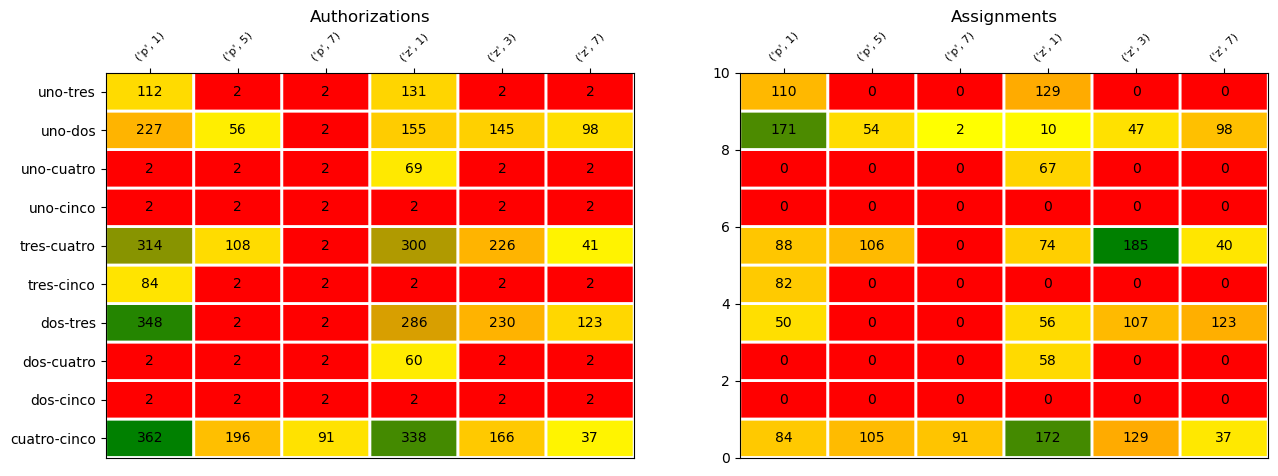

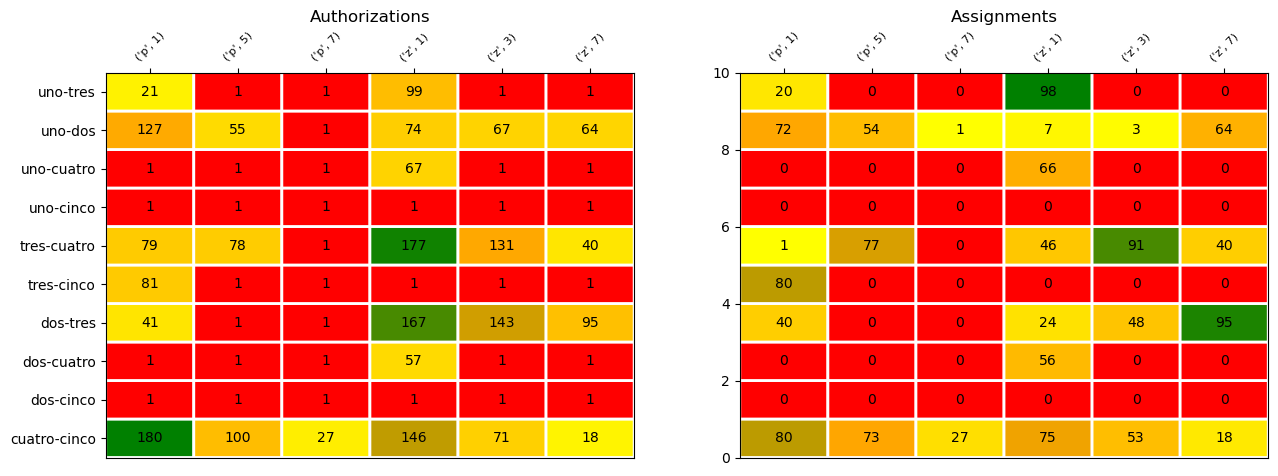

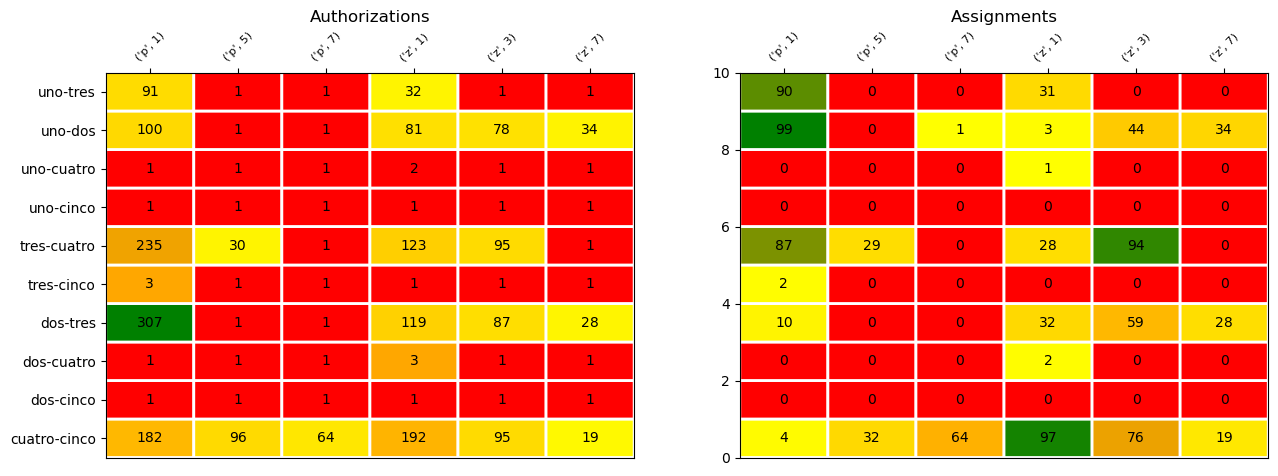

In [10]:
grafica(a,attrs, 5, 15, 2)
grafica(a,attrs, 5, 15, 2, 1)
grafica(a,attrs, 5, 15, 2, 0)

# Borradores

In [11]:

# # [start] --- Restricciones de Capitalismo
# def autorizationsActivAdj(model,i,j,v,t):
#     return sum(model.Y[i,j,v,k,t] for k in model.VK[v]) <= model.Q*model.B[i,j,v,t]
# model.ConstrainAutorizationsActivAdj = Constraint(model.AD, model.V, model.T, rule = autorizationsActivAdj)

# def autorizationsActivBig(model,i,j,v,t):
#     expensClass = list(model.VK[v])[0]
#     return model.Y[i,j,v,expensClass,t] <= model.Q*model.B[i,j,v,t]
# model.ConstrainAutorizationsActivBig = Constraint(model.NAD, model.V, model.T, rule = autorizationsActivBig)

# def autorizationsInheri(model,o,d,i,j,v,t):
#     expensClass = list(model.VK[v])[0]
#     return model.Y[i, j, v, expensClass, t] >= model.B[o,d,v,t] - (1 - model.B[i,j,v,t])
# model.ConstrainAutorizationsInheri = Constraint(model.BRI, model.V, model.T, rule = autorizationsInheri)

# # [end] --- Restricciones de Capitalismo